# Mise en situation

On s'intéresse à l'asservissement d'un système, quel qu'il soit. Une étude préliminaire nous a permis d'identifier le comportement du bloc hacheur, moteur, réducteur. Celui-ci peut se modéliser par un système d'ordre 1 : $H(p)=\dfrac{K_v}{1+T_v p}$ avec $K_v=5$ et $T_v=1\,\text{s}$.

![Schema blocs](images/im3.PNG)

In [1]:
import matplotlib.pyplot as plt
Kv = 5
Tv = 1  ## Seconde
h=0.001 ## Seconde

### Préliminaires

#### Question 1 : Donner dans le domaine temporel une relation liant $e_v(t)$, $\varepsilon_v(t)$ et $s_v(t)$.

#### Réponse 1
On a  $\varepsilon_v(t) = e_v(t) - s_v(t)$.

#### Question 2 : Donner dans le domaine temporel une relation liant$s_v(t)$, $\varepsilon_v(t)$ et leurs dérivées.

#### Réponse 2
On a $S_v(p)=\dfrac{K_v}{1+T_vp}\varepsilon_v(p)$ $\Leftrightarrow S_v(p)+S_v(p) T_v p= K_v \varepsilon_v(p) $ soit 
$\Leftrightarrow s_v(t)+ T_v \dfrac{\text{d} s_v(t)}{\text{d} t}= K_v \varepsilon_v(t) $.

### Discrétisation du signal
On souhaite effectuer une simulation numérique. Le pas de temps est noté $h$. On choisit $h=10^{-3}\; \text{s}$.
Dans le domaine numérique, on appelle $f_k$ le k-ième échantillon de la fonction $f$ à laquelle on associe la valeur $f(t_k)$ à l'instant $t_k=k \times h$.
On note $f_0=f(0)$. On rappelle que toutes les conditions initiales sont nulles.


#### Question 3
Montrer que dans le domaine numérique :
 - $\varepsilon_{vk}=e_{vk}-s_{vk}$;
 - $s_{vk}=\dfrac{1}{h+T_v}(T_v s_{vk-1} + K_v h \varepsilon_{vk})$.


#### Réponse 3
À l'instant $t_k$, $\varepsilon_v(t_k) = e_v(t_k) - s_v(t_k)$ soit $\varepsilon_{vk} = e_{vk} - s_{vk}$.

De plus, on a $\dfrac{\text{d} s_v(t)}{\text{d} t}\simeq \dfrac{s_v(t)-s_v(t-h)}{h} = \dfrac{s_{v_k}-s_{v_{k-1}}}{h}$. En réutilisant la question 2, on a donc 
$s_{vk}+ T_v \dfrac{s_{v_k}-s_{v_{k-1}}}{h}= K_v \varepsilon_{vk} $ 
$ \Leftrightarrow s_{vk}+ T_v \dfrac{s_{v_k}}{h} - T_v \dfrac{s_{v_{k-1}}}{h} = K_v \varepsilon_{vk} $ 
$ \Leftrightarrow s_{vk}\left( 1+\dfrac{T_v}{h} \right) = K_v \varepsilon_{vk} + T_v \dfrac{s_{v_{k-1}}}{h}$
$ \Leftrightarrow s_{vk} = \dfrac{1}{1+\dfrac{T_v}{h} }\left( K_v\varepsilon_{vk} + T_v \dfrac{s_{v_{k-1}}}{h} \right)$
$ \Leftrightarrow s_{vk} = \dfrac{1}{h+{T_v}}\left(  hK_v\varepsilon_{vk} + T_v s_{v_{k-1}} \right)$.


#### Question 4 
Implémenter un code Python qui effectue une simulation de l'asservissement en vitesse pour une entrée échelon d'amplitude 2 rad/s. Tracer la réponse simulée $s_v(t)$ et l'écart $\varepsilon_v(t)$ en fonction du temps $t$ sur un intervalle de 2 secondes.

In [21]:
#Réponse 4
les_t   = [0]
les_sv  = [0]
les_eps = [0]
les_ev  = [2]
t=h
while t<2:
    les_t.append(t)
    les_ev.append(les_ev[-1])
    les_eps.append(les_ev[-1]-les_sv[-1])
    les_sv.append((1/(h+Tv))*(h*Kv*les_eps[-1]+Tv*les_sv[-1]))
    t=t+h

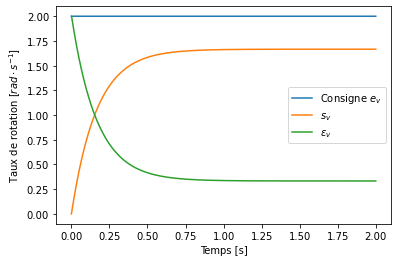

In [12]:
plt.plot(les_t,les_ev,label="Consigne $e_v$")
plt.plot(les_t,les_sv,label="$s_v$")
plt.plot(les_t[1:],les_eps[1:],label="$\\epsilon_v$")
plt.xlabel("Temps [s]")
plt.ylabel("Taux de rotation [$rad\cdot s^{-1}$]")
plt.legend()
plt.show()

### Mise en place d'un correcteur PI
Afin d'avoir un écart statique nul, on place un correcteur PI.
![Schema blocs](images/im4.PNG)

#### Question 5 
Est ce que le correcteur PI peut poser un problème de stabilité dans notre cas d'étude ? Expliquer.

#### Réponse 5
La FTBO est un système du premier ordre. Le déphasage minimal est de -90°. Dans le pire des cas, le correcteur ajoute un déphasage de -90°. La phase du système en boucle ouverte sera donc toujours supérieure à -180°. La marge de gain est donc infinie et la marge de phase est donc toujours positive. Le système est donc stable. Cependant, la marge de phase peut être faible.
**Il n'y aura donc pas de problème d'instabilité dans notre cas.**

#### Question 6
Déterminer la valeur de $T_i$ qui permet de compenser le pôle dominant la fonction de transfert en boucle ouverte non corrigée.

#### Réponse 6
Le correcteur est de la forme $C(p)=K_p\left(1+\dfrac{1}{T_i p}\right)$. On a donc $C(p)=K_p\dfrac{T_i p +1}{T_i p}$. $T_i=T_v=1\,\text{s}$ permet donc de compenser le pole $-\dfrac{1}{T_v}$.

In [4]:
# Réponse 6
Ti=Tv

#### Question 7
Déterminer la valeur de $K_p$ qui donne un temps de réponse théorique de $T_{r5\%}=0,15$ s.

#### Réponse 7
La fonction en BO est donc donnée par $FTBO(p)=K_p\dfrac{T_i p +1}{T_i p} \cdot \dfrac{K_v}{1+T_v p} =K_p\dfrac{K_v}{T_i p}$. La fonction en boucle fermée est donc donnée par $FTBF(p)=\dfrac{K_pK_v}{T_i p+K_pK_v}$ $=\dfrac{\dfrac{K_pK_v}{K_pK_v}}{\dfrac{T_i}{K_pK_v} p+1}$ $=\dfrac{1}{\dfrac{T_i}{K_pK_v} p+1}$. On doit donc avoir $3 \dfrac{T_i}{K_pK_v} = 0,15$ soit $ {K_p} = \dfrac{3 T_i }{0,15 K_v }$.

In [5]:
# Réponse 7
Kp=(3*Ti)/(0.15*Kv)

#### Question 8
Donner l'expression de $c_v(t)$ en fonction de $\varepsilon_v(t)$.

#### Réponse 8
On a $C_v(p)=K_p\dfrac{T_i p +1}{T_i p}\varepsilon_v(p)$ soit  $C_v(p)=K_p \varepsilon_v(p)+K_p\dfrac{\varepsilon_v(p)}{T_i p}$. On a donc $c_v(t)=K_p \varepsilon_v(t)+\dfrac{K_p}{T_i} \int_0^t \varepsilon_v(t)\text{d}t$.

#### Question 9
Proposer alors un schéma numérique exprimant $c_{vk}$ en fonction de $\varepsilon_{vk}$ et de ces prédécesseurs en appliquant la méthode d'intégration des rectangles à droite.

#### Réponse 9
0n a $c_{vk}=K_p \varepsilon_{vk}+\dfrac{K_p h}{T_i} \sum\limits_{i=1}^{k}  \varepsilon_{vi}$.

#### Question 10
Après avoir exprimé $c_{vk-1}$ en fonction de $\varepsilon_{vk-1}$ et de ces prédécesseurs, montrer que l'on peut aboutir à la relation de récurrence suivante :
$c_{vk}  = c_{vk - 1}  + K_p \left( \varepsilon _{vk} \left( 1 + \dfrac{h}{T_i} \right) - \varepsilon _{vk - 1}  \right)$.

#### Réponse 10

D'après la question précédente, $c_{vk-1}=K_p \varepsilon_{vk-1}+\dfrac{K_p h}{T_i} \sum\limits_{i=1}^{k-1}  \varepsilon_{vi}$. 


On a $c_{vk}=K_p \varepsilon_{vk}+\dfrac{K_p h}{T_i} \sum\limits_{i=1}^{k}  \varepsilon_{vi}$
$=K_p \varepsilon_{vk}+\dfrac{K_p h}{T_i} \sum\limits_{i=1}^{k-1}  \varepsilon_{vi}+\dfrac{K_p h}{T_i} \varepsilon_{vk}$
$=K_p \varepsilon_{vk}+ c_{vk-1}-K_p \varepsilon_{vk-1} +\dfrac{K_p h}{T_i} \varepsilon_{vk}$.

On a donc : $c_{vk} =c_{vk-1} + K_p\left( \varepsilon_{vk}\left(1+ \dfrac{h}{T_i} \right) - \varepsilon_{vk-1}\right)$.





#### Question 11
Implémenter un code Python qui effectue une simulation de l'asservissement en vitesse avec correction PI pour une entrée échelon d'amplitude 2 rad/s.

In [6]:
#Réponse 11
les_t_pi   = [0]
les_sv_pi  = [0]
les_eps_pi = [0]
les_ev_pi  = [2]
les_cv_pi  = [0]
t=h
print(Kp,Ti)
while t<2:
    les_t_pi.append(t)
    les_eps_pi.append(les_ev_pi[-1]-les_sv_pi[-1])
    les_cv_pi.append(les_cv_pi[-1]+Kp*(les_eps_pi[-1]*(1+h/Ti)-les_eps_pi[-2]))
    les_sv_pi.append((1/(h+Tv))*(h*Kv*les_cv_pi[-1]+Tv*les_sv_pi[-1]))
    t=t+h

4.0 1


#### Question 12
Tracer la réponse simulée $s_v(t)$ en fonction du temps $t$.

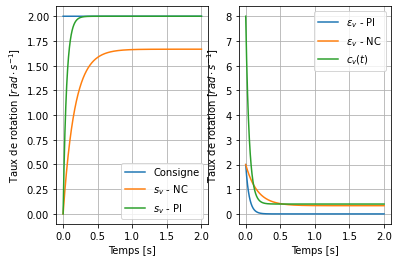

In [20]:
## Réponse 12

plt.subplot(1, 2, 1)
plt.plot(les_t,les_ev,label="Consigne")
plt.plot(les_t,les_sv,label="$s_v$ - NC")
plt.plot(les_t,les_sv_pi,label="$s_v$ - PI")
plt.xlabel("Temps [s]")
plt.ylabel("Taux de rotation [$rad\cdot s^{-1}$]")

plt.legend()
plt.grid()
plt.subplot(1, 2, 2)

plt.plot(les_t_pi[1:],les_eps_pi[1:],label="$\\epsilon_v$ - PI")
plt.plot(les_t[1:],les_eps[1:],label="$\\epsilon_v$ - NC")
plt.plot(les_t_pi[1:],les_cv_pi[1:],label="$c_v(t)$")

plt.xlabel("Temps [s]")
plt.ylabel("Taux de rotation [$rad\cdot s^{-1}$]")
plt.legend()
plt.grid()
plt.show()

#### Question 13
Conclure quant au réglage de votre correcteur.

#### Réponse 13
Ben, il est bien réglé, on a tout fait pour !

### Asservissement de position angulaire

On souhaite maintenant réaliser un asservissement en position du système précédent. Le cahier des charges est le suivant : 
 - écart statique nul;
 - écart de trainage inférieur à 1°;
 - marge de phase supérieure à 40°;
 - marge de gain supérieure à 10 dB;
 - premier dépassement relatif inférieur à 30%;
 - temps de réponse à 5% inférieur à 0,5 s.
 
Dans le domaine symbolique de Laplace, le schéma bloc mathématiquement équivalent est le suivant.

![Schema blocs](images/im5.PNG)

On prend $K_{\theta}=1$ (rad/s)/rad.

On conserve à l'identique la boucle de vitesse précédente.


#### Question 14
Donner l'expression de $s_{\theta}(t)$ en fonction de $s_v(t)$.

#### Question 15
Proposer alors un schéma numérique exprimant $s_{\theta k}$ en fonction de $s_{vk}$ et de ces prédécesseurs en appliquant la méthode d'intégration des rectangles à droite.

#### Question 16
Montrer que l'on peut écrire la relation de récurrence suivante :
$s_{\theta k}  = s_{\theta k-1}  + h s_{vk}$.

#### Question 17
Implémenter un code Python qui effectue une simulation de l'asservissement en position sans correction pour une entrée échelon d'amplitude 1 rad.

#### Question 18
Tracer la réponse simulée $s_{\theta}(t)$ en fonction du temps $t$.

#### Question 19
Le cahier des charges est-il satisfait ?

#### Question 20
Déterminer la fonction de transfert en boucle fermée.

#### Question 21
Quelle est la valeur du coefficient d'amortissement qui permet d'avoir un premier dépassement relatif de 5\% ?
![Abaque](images/im7.PNG)


#### Question 22
Déterminer la valeur de $K_\theta$ correspondante.

#### Question 23
Quel est alors le temps de réponse ?

On donne ci-après le diagramme de Bode de la fonction en boucle ouverte non corrigée ($K_\theta=1$ (rad/s)/rad).
![BO non corrigée](images/im6.PNG)

#### Question 24
Retracer ce diagramme de Bode dans Python.

#### Question 25
Vérifier que pour la valeur de $K_\theta=10$ (rad/s)/rad, les marges de stabilité sont respectées.

#### Question 26
Effectuer une simulation de l'asservissement en position avec la correction proportionnelle $K_\theta=10$ (rad/s)/rad, pour une entrée échelon d'amplitude 1 rad.

#### Question 27
Tracer la réponse simulée $s_{\theta}(t)$ en fonction du temps $t$.

#### Question 28
Le cahier des charges est-il respecté ?

#### Question 29
Effectuer une simulation de l'asservissement en position avec la correction proportionnelle $K_\theta=10$ (rad/s)/rad, pour une entrée en rampe de pente 1 rad/s.

#### Question 30
Tracer la réponse simulée $s_{\theta}(t)$ en fonction du temps $t$.

#### Question 31
Le cahier des charges est-il respecté ?

#### Question 32
Montrer que l'erreur de traînage pour une entrée en rampe de pente 1 rad/s est donnée par $\varepsilon_t=\dfrac{1}{K_\theta}$. Déterminer alors la valeur de $K_\theta$ permettant de satisfaire l'exigence $\varepsilon_t=1^o$.

#### Question 33
On prend $K_\theta=57$ (rad/s)/rad afin de satisfaire le critère de précision de l'erreur de traînage. Les marges de stabilité sont-elles respectées ?

#### Question 34
Effectuer une simulation de l'asservissement en position avec la correction proportionnelle $K_\theta=53$ (rad/s)/rad, pour une entrée échelon d'amplitude 1 rad, puis pour une entrée en rampe de pente 1 rad/s.

#### Question 35
Tracer les réponses simulées $s_{\theta}(t)$ en fonction du temps $t$.

#### Question 36
Le cahier des charges est-il respecté ?

On adopte une correction par avance de phase : 
![Avance de phase](images/im8.PNG)


#### Question 37
Avec $K_\theta=57$, quelle est la valeur de la phase $\phi_m$ à apporter au voisinage de la pulsation $\omega_m$ pour laquelle le gain est nul, pour respecter la marge de phase de 40° ?

#### Question 38
En déduire alors la valeur de $a$ (on rappelle que $a = \dfrac{{1 + \sin \phi _m }}{{1 - \sin \phi _m }}$).

#### Question 39
Déterminer alors la valeur de $T$ sachant que $\omega_m=\dfrac{1}{T \sqrt{a}}$.

#### Question 40
Donner dans le domaine temporel une relation liant $e_v(t)$ et $\varepsilon_\theta$ et leurs dérivées.

#### Question 41
Montrer que dans le domaine numérique, on peut donner la relation de récurrence suivante :
$e_{vk}=\dfrac{T}{h+T} e_{vk-1}+\dfrac{K_\theta}{h+T}((h+aT) \varepsilon_{\theta k}-aT \varepsilon_{\theta k-1})$.

On donne pour la suite $K_\theta=57$, $a=1,42$ et $T=0,028$.

#### Question 42
Effectuer une simulation de l'asservissement en position avec la correction par avance de phase, pour une entrée échelon d'amplitude 1 rad, puis pour une entrée en rampe de pente 1 rad/s.

#### Question 43
Tracer les réponses simulées $s_{\theta}(t)$ en fonction du temps $t$.

#### Question 44
Le cahier des charges est-il respecté ?

On donne ci-après le diagramme de Bode de la fonction en boucle ouverte avec correction par avance de phase.
![Schema blocs](images/im10.PNG)


#### Question 45
Les marges de stabilité sont-elles respectées ? Conclure sur la totalité du cahier des charges.